# PCA

## Manual Method: Eigen decomposition of the covariance matrix

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Step 1: Create a simple 3D dataset
# Assume we have 3D data points (X, Y, Z)
np.random.seed(0)
X = np.array([[2.5, 2.4, 3.1],
              [0.5, 0.7, 0.8],
              [2.2, 2.9, 2.7],
              [1.9, 2.2, 3.0],
              [3.1, 3.0, 3.4],
              [2.3, 2.7, 3.3],
              [2.0, 1.6, 2.9],
              [1.0, 1.1, 1.4],
              [1.5, 1.6, 1.7],
              [1.1, 0.9, 1.3]])
X

array([[2.5, 2.4, 3.1],
       [0.5, 0.7, 0.8],
       [2.2, 2.9, 2.7],
       [1.9, 2.2, 3. ],
       [3.1, 3. , 3.4],
       [2.3, 2.7, 3.3],
       [2. , 1.6, 2.9],
       [1. , 1.1, 1.4],
       [1.5, 1.6, 1.7],
       [1.1, 0.9, 1.3]])

In [4]:
# Step 2: Center the data (this is usually done automatically in PCA, but we'll do it here manually)
# Subtract the mean of each feature to center the data around 0
mean_X = np.mean(X, axis=0)
X_centered = X - mean_X
X_centered

array([[ 0.69,  0.49,  0.74],
       [-1.31, -1.21, -1.56],
       [ 0.39,  0.99,  0.34],
       [ 0.09,  0.29,  0.64],
       [ 1.29,  1.09,  1.04],
       [ 0.49,  0.79,  0.94],
       [ 0.19, -0.31,  0.54],
       [-0.81, -0.81, -0.96],
       [-0.31, -0.31, -0.66],
       [-0.71, -1.01, -1.06]])

In [5]:
# Step 3: Compute covariance matrix
# The covariance matrix captures the relationship between features (columns in X)
cov_matrix = np.cov(X_centered.T)
cov_matrix

array([[0.61655556, 0.61544444, 0.70933333],
       [0.61544444, 0.71655556, 0.726     ],
       [0.70933333, 0.726     , 0.916     ]])

In [7]:
# Step 4: Perform Eigen decomposition on the covariance matrix
# This will give us eigenvalues and eigenvectors, which form the basis for PCA
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([2.13131399, 0.03425595, 0.08354118]),
 array([[ 0.52692233,  0.84922771,  0.03413439],
        [ 0.55813841, -0.31546248, -0.76744051],
        [ 0.64096363, -0.42343326,  0.64021083]]))

In [8]:
# Step 5: Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]
eigenvalues, eigenvectors

(array([2.13131399, 0.08354118, 0.03425595]),
 array([[ 0.52692233,  0.03413439,  0.84922771],
        [ 0.55813841, -0.76744051, -0.31546248],
        [ 0.64096363,  0.64021083, -0.42343326]]))

In [9]:
# Step 6: Select the top k eigenvectors (for PCA to 2D, we select the first 2 eigenvectors)
# These eigenvectors form the principal components
k = 2
selected_eigenvectors = eigenvectors[:, :k]
selected_eigenvectors

array([[ 0.52692233,  0.03413439],
       [ 0.55813841, -0.76744051],
       [ 0.64096363,  0.64021083]])

In [10]:
# Step 7: Project the data onto the new 2D space
# This is done by multiplying the centered data by the selected eigenvectors
X_pca = np.dot(X_centered, selected_eigenvectors)
X_pca

array([[ 1.11137731,  0.12126289],
       [-2.36551899, -0.11484192],
       [ 0.97598437, -0.52878201],
       [ 0.61949987,  0.19024928],
       [ 1.95470285, -0.12665754],
       [ 1.3016271 ,  0.01224602],
       [ 0.2732127 ,  0.59010594],
       [-1.49422428, -0.02062443],
       [-0.75940482, -0.19521425],
       [-1.61725609,  0.07225603]])

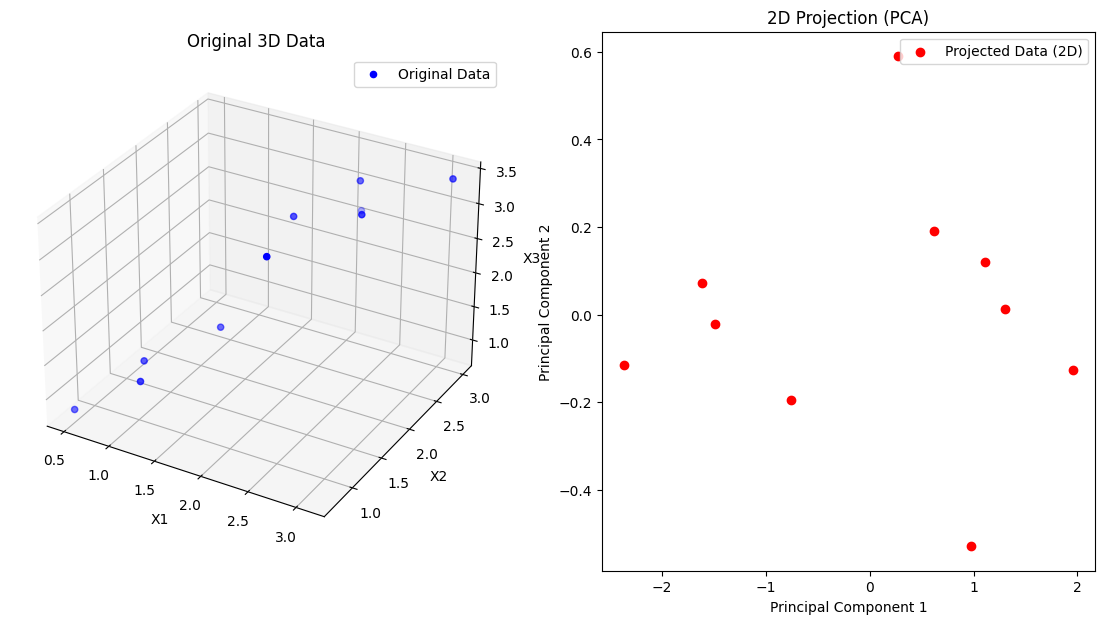

In [11]:
# Step 8: Visualization of the original 3D data and its projection onto 2D
# Create a 3D scatter plot of the original data
fig = plt.figure(figsize=(14, 7))

# Original 3D data visualization
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], color='b', label='Original Data')
ax1.set_title('Original 3D Data')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')
ax1.legend()

# 2D Projection visualization
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], color='r', label='Projected Data (2D)')
ax2.set_title('2D Projection (PCA)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()

plt.show()



## Scikit-Learn PCA: Built-in PCA from Scikit-Learn, which internally uses SVD.

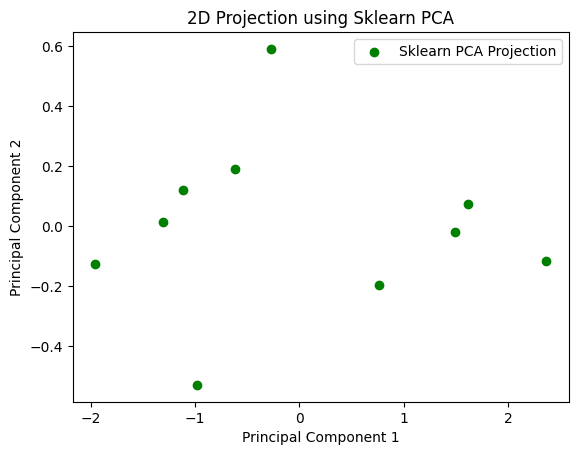

In [18]:
# Step 9: Explain PCA using sklearn
# Sklearn's PCA automatically handles all these steps in the background
# Here we use sklearn PCA for verification purposes
pca = PCA(n_components=2)
X_pca_sklearn = pca.fit_transform(X)

# Visualizing the sklearn PCA result (should be similar to the manual one)
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], color='g', label='Sklearn PCA Projection')
plt.title('2D Projection using Sklearn PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

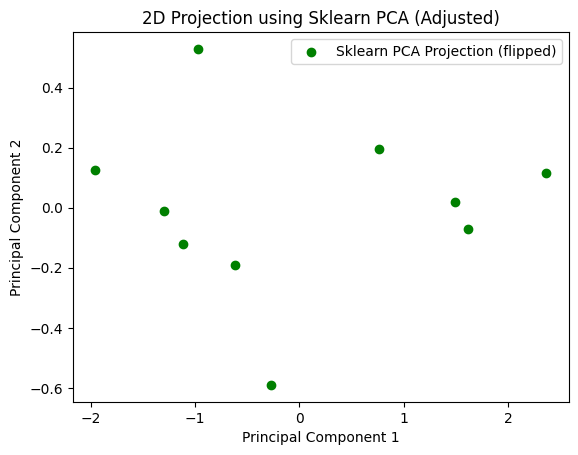

In [ ]:
# Visualizing the sklearn PCA result (should be similar to the manual one)
plt.scatter(X_pca_sklearn[:, 0], -X_pca_sklearn[:, 1], color='g', label='Sklearn PCA Projection (flipped)')
plt.title('2D Projection using Sklearn PCA (Adjusted)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
# Step 2: Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
explained_variance_ratio, cumulative_explained_variance


(array([0.94762503, 0.03714409]), array([0.94762503, 0.98476912]))

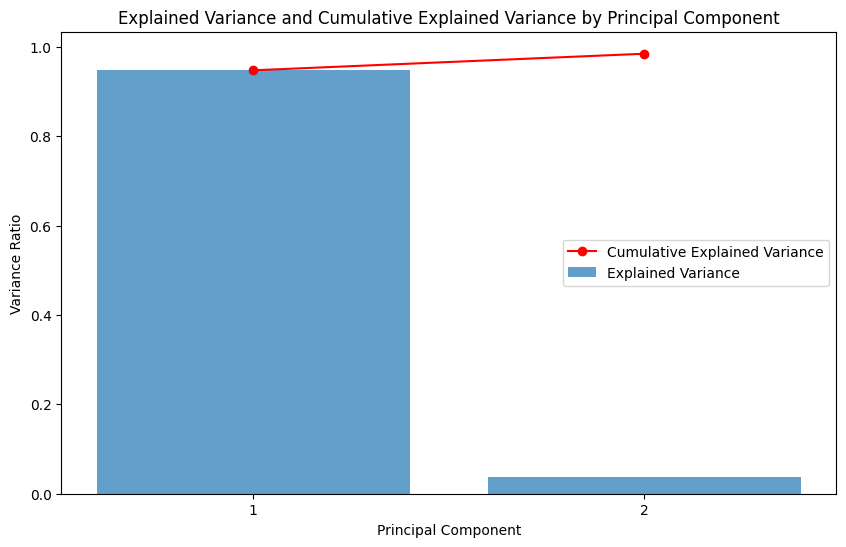

In [ ]:
# Step 3: Plot the explained variance for each component
plt.figure(figsize=(10, 6))

# Plot the explained variance ratio for each component
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Explained Variance')

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='red', label='Cumulative Explained Variance')

# Step 4: Add titles and labels
plt.title('Explained Variance and Cumulative Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')

# Show the plot
plt.show()

## SVD
SVD: Singular Value Decomposition method, which finds the principal components without explicitly computing the covariance matrix.

In [12]:
# Import necessary libraries
import pandas as pd

In [ ]:
# Step 1: Center the data - Already performed above

In [13]:
# Step 2: Perform SVD (Singular Value Decomposition)
U, Sigma, Vt = np.linalg.svd(X_centered)
U, Sigma, Vt

(array([[-0.25375614, -0.13984803, -0.21260639, -0.28755194, -0.36802215,
         -0.44705095, -0.03113574,  0.37597112,  0.24284228,  0.50156935],
        [ 0.54010907,  0.13244297,  0.12647041, -0.36066447,  0.49004454,
         -0.33841047,  0.32847101, -0.08570799,  0.07675117,  0.26243538],
        [-0.22284243,  0.60982487,  0.22526098,  0.20646874, -0.27314017,
         -0.02082542,  0.59675877,  0.0572127 , -0.18088405,  0.13390455],
        [-0.14144782, -0.2194075 ,  0.51517416,  0.62563767,  0.26784328,
         -0.3050764 , -0.12242176,  0.04614501,  0.20134616,  0.22925445],
        [-0.44630913,  0.14606948, -0.56060972,  0.14314506,  0.64038527,
          0.01462455,  0.09912645,  0.13538946, -0.04162713,  0.06709509],
        [-0.29719508, -0.01412289,  0.41624616, -0.39153887,  0.19644653,
          0.62403859, -0.02536677,  0.09942224,  0.20728364,  0.32156169],
        [-0.06238151, -0.6805475 , -0.05491693,  0.03669859, -0.04025274,
          0.11000411,  0.7051912

In [14]:
# Step 3: Reconstruct Sigma as a diagonal matrix (full size for visualization purposes)
Sigma_full = np.zeros((X_centered.shape[0], X_centered.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)
Sigma_full

array([[4.37970614, 0.        , 0.        ],
       [0.        , 0.86710471, 0.        ],
       [0.        , 0.        , 0.55525089],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [15]:
# Displaying the results
# Create DataFrames to display U, Sigma, and Vt matrices for better understanding

# U matrix
U_df = pd.DataFrame(U, columns=[f"U{i+1}" for i in range(U.shape[1])])

# Sigma matrix (diagonalized singular values)
Sigma_df = pd.DataFrame(Sigma_full, columns=[f"S{i+1}" for i in range(Sigma_full.shape[1])])

# Vt matrix (Transpose of V)
Vt_df = pd.DataFrame(Vt, columns=[f"V{i+1}" for i in range(Vt.shape[1])])

# Show U matrix
print("U Matrix:")
print(U_df)

# Show Sigma matrix
print("\nSigma Matrix:")
print(Sigma_df)

# Show Vt matrix
print("\nVt Matrix:")
print(Vt_df)

U Matrix:
         U1        U2        U3        U4        U5        U6        U7  \
0 -0.253756 -0.139848 -0.212606 -0.287552 -0.368022 -0.447051 -0.031136   
1  0.540109  0.132443  0.126470 -0.360664  0.490045 -0.338410  0.328471   
2 -0.222842  0.609825  0.225261  0.206469 -0.273140 -0.020825  0.596759   
3 -0.141448 -0.219407  0.515174  0.625638  0.267843 -0.305076 -0.122422   
4 -0.446309  0.146069 -0.560610  0.143145  0.640385  0.014625  0.099126   
5 -0.297195 -0.014123  0.416246 -0.391539  0.196447  0.624039 -0.025367   
6 -0.062382 -0.680547 -0.054917  0.036699 -0.040253  0.110004  0.705191   
7  0.341170  0.023785  0.046563  0.122475  0.064349  0.161461  0.004197   
8  0.173392  0.225133 -0.205310  0.195368 -0.092954  0.162978  0.107895   
9  0.369261 -0.083330 -0.296271  0.353376 -0.122411  0.371144 -0.024619   

         U8        U9       U10  
0  0.375971  0.242842  0.501569  
1 -0.085708  0.076751  0.262435  
2  0.057213 -0.180884  0.133905  
3  0.046145  0.201346  0.229

In [16]:
# Step 4: Project the data onto the first two principal components for visualization
V = Vt.T  # Transpose Vt to get V matrix (principal components directions)
X_svd_2D = X_centered.dot(V[:, :2])  # Projecting the centered data onto the first 2 PCs
X_svd_2D

array([[-1.11137731, -0.12126289],
       [ 2.36551899,  0.11484192],
       [-0.97598437,  0.52878201],
       [-0.61949987, -0.19024928],
       [-1.95470285,  0.12665754],
       [-1.3016271 , -0.01224602],
       [-0.2732127 , -0.59010594],
       [ 1.49422428,  0.02062443],
       [ 0.75940482,  0.19521425],
       [ 1.61725609, -0.07225603]])

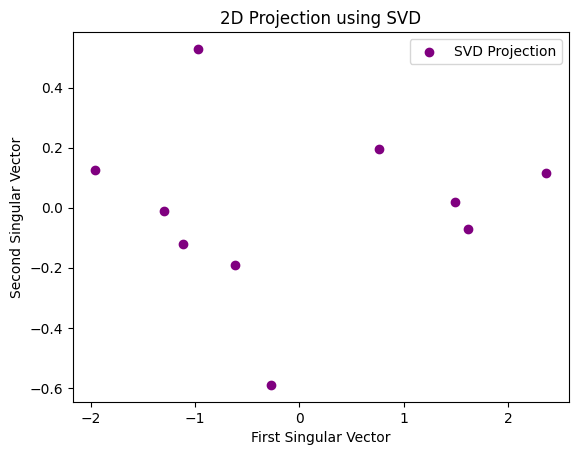

In [17]:
# Step 5: Visualization of the 2D projection
plt.scatter(X_svd_2D[:, 0], X_svd_2D[:, 1], color='purple', label='SVD Projection')
plt.title('2D Projection using SVD')
plt.xlabel('First Singular Vector')
plt.ylabel('Second Singular Vector')
plt.legend()
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd


# Step 2: Perform SVD (Singular Value Decomposition)
U, Sigma, Vt = np.linalg.svd(X_centered)

# Step 3: Reconstruct Sigma as a diagonal matrix (full size for visualization purposes)
Sigma_full = np.zeros((X_centered.shape[0], X_centered.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)

# Displaying the results
# Create DataFrames to display U, Sigma, and Vt matrices for better understanding

# U matrix
U_df = pd.DataFrame(U, columns=[f"U{i+1}" for i in range(U.shape[1])])

# Sigma matrix (diagonalized singular values)
Sigma_df = pd.DataFrame(Sigma_full, columns=[f"S{i+1}" for i in range(Sigma_full.shape[1])])

# Vt matrix (Transpose of V)
Vt_df = pd.DataFrame(Vt, columns=[f"V{i+1}" for i in range(Vt.shape[1])])

# Show U matrix
print("U Matrix:")
print(U_df)

# Show Sigma matrix
print("\nSigma Matrix:")
print(Sigma_df)

# Show Vt matrix
print("\nVt Matrix:")
print(Vt_df)

# Step 4: Project the data onto the first two principal components for visualization
V = Vt.T  # Transpose Vt to get V matrix (principal components directions)
X_svd_2D = X_centered.dot(V[:, :2])  # Projecting the centered data onto the first 2 PCs

# Step 5: Visualization of the 2D projection
plt.scatter(X_svd_2D[:, 0], X_svd_2D[:, 1], color='purple', label='SVD Projection')
plt.title('2D Projection using SVD')
plt.xlabel('First Singular Vector')
plt.ylabel('Second Singular Vector')
plt.legend()
plt.show()
